In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sb
from string import ascii_letters


%matplotlib inline

In [6]:
cadastro_df = pd.read_csv('dataset/cadastro.csv.csv')
salarios_df = pd.read_csv('dataset/salario_profissoes.csv.csv')

In [3]:
cadastro_df.head(2)

,nome,sobrenome,ano_nascimento,sexo,cidade,profissão,experiencia profissional,estado_civil,filhos,lazer_final_de_semana,pratica_esporte,qual_esporte,quanta_vezes_na_semana_pratica_esporte,tem carro,escolaridade
0,Dirceu,Manolo,1985,m,São Vicente,Cientista de Dados,4,Casado,1,"estudar, academia, jogar video game,surfar",sim,academia,3.0,sim,Ensino Superior
1,Maria,Silva,1970,f,Santos,dona de casa,2,Casada,3,ver tv,não,-,0.0,não,Ensino Médio


Qual a idade média das pessoas no cadastro ?
    R: a idade média das pessoas é de 33 anos 

In [4]:
cadastro_df['ano_atual'] = 2020

In [5]:
cadastro_df['idade'] = cadastro_df['ano_atual'] - cadastro_df['ano_nascimento']

In [6]:
cadastro_df[['idade']].mean().round(0)

idade    33.0
dtype: float64

Quantos homens tem no cadastro ?
    R: temos 16 homens no cadastro

Quantas mulheres tem no cadastro ?
    R: temos 14 mulheres no cadastro

In [7]:
cadastro_df['sexo'].value_counts()

m    16
f    14
Name: sexo, dtype: int64

Qual a idade média dos homens?
    R: a idade média dos homens é de 32 anos

In [8]:
cadastro_homens_df = cadastro_df.loc[(cadastro_df.sexo == 'm')] 
cadastro_homens_df[['idade']].mean().round(0)

idade    32.0
dtype: float64

Qual a idade média das mulheres?
    R: a idade média dos homens é de 34 anos

In [9]:
cadastro_mulheres_df = cadastro_df.loc[(cadastro_df.sexo == 'f')]
cadastro_mulheres_df[['idade']].mean().round(0)

idade    34.0
dtype: float64

Qual a idade média das mulheres? R: a idade média dos homens é de 34 anos
    
Qual a idade média dos homens? R: a idade média dos homens é de 32 anos

In [36]:
cadastro_df.groupby(by='sexo')['idade'].mean().round(0)

sexo
f    34.0
m    32.0
Name: idade, dtype: float64

Crie um gráfico de barras e mostre a distribuição de escolaridade no cadastro ?

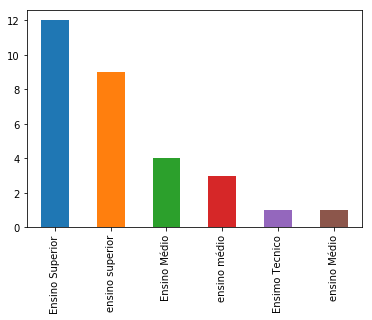

In [10]:
cadastro_df['escolaridade'].value_counts().plot(kind='bar')

In [11]:
cadastro_df['escolaridade'].replace("ensino médio", "Ensino Médio", inplace=True)
cadastro_df['escolaridade'].replace("ensino Médio", "Ensino Médio", inplace=True)
cadastro_df['escolaridade'].replace("ensino superior", "Ensino Superior", inplace=True)
cadastro_df['escolaridade'].replace("Ensimo Tecnico", "Ensino Técnico", inplace=True)
cadastro_df['pratica_esporte'].replace('NaN','não', inplace=True)

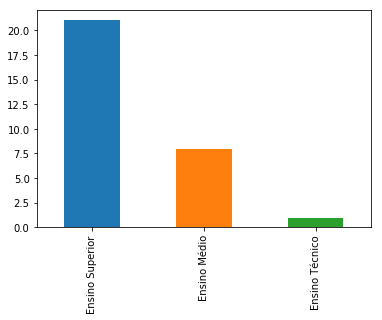

In [12]:
cadastro_df['escolaridade'].value_counts().plot(kind='bar')

Mostre a Média Salarial do cadastro ?
    R: média salarial é de R$ 4.617

In [13]:
salarios_df = salarios_df.rename(columns={"Profissões": "profissão"})

In [14]:
cadastro_completo_df = cadastro_df.merge(salarios_df, left_on='profissão', right_on='profissão')

In [15]:
cadastro_completo_df = cadastro_completo_df.rename(columns={"experiencia profissional":"experiencia_profissional"})
cadastro_completo_df = cadastro_completo_df.rename(columns={"salaior +3 anos":"salario +3 anos"})
salario_senior_df = cadastro_completo_df.loc[cadastro_completo_df.experiencia_profissional > 3]
salario_senior_df = salario_senior_df.rename(columns={"salario +3 anos":"salario"})
salario_senior_df = salario_senior_df.drop('salario até 3 anos', axis=1)
salario_junior_df = cadastro_completo_df.loc[cadastro_completo_df.experiencia_profissional <= 3]
salario_junior_df = salario_junior_df.rename(columns={"salario até 3 anos":"salario"})
salario_junior_df = salario_junior_df.drop('salario +3 anos', axis=1)

In [16]:
total_salario_senior = salario_senior_df[['salario']].sum()

In [17]:
qtd_senior = salario_senior_df[['salario']].count()

In [18]:
total_salario_junior = salario_junior_df[['salario']].sum()

In [19]:
qtd_junior = salario_junior_df[['salario']].count()

In [20]:
média_salarial_do_cadastro = (total_salario_senior + total_salario_junior) / (qtd_senior + qtd_junior)
print(média_salarial_do_cadastro.round(0))

salario    4617.0
dtype: float64


Quem tem o maior salário ?
    R: Mirtes é quem tem o maior salario de R$ 20.000

In [21]:
salario_senior_df['salario'].max()

20000

In [22]:
maior_salario = salario_senior_df.loc[salario_senior_df.salario >= 20000]
maior_salario

,nome,sobrenome,ano_nascimento,sexo,cidade,profissão,experiencia_profissional,estado_civil,filhos,lazer_final_de_semana,pratica_esporte,qual_esporte,quanta_vezes_na_semana_pratica_esporte,tem carro,escolaridade,ano_atual,idade,salario
9,Mirtes,NaN,1976,f,Vitoria,Médica,5,Casada,2,leitura e ficar com os filhos,sim,crossfit,3.0,sim,Ensino Superior,2020,44,20000


Tirando desempregado quem recebe menos ?
    R: Maria Silva é quem recebe menos, com um salario de R$1.200

In [23]:
recebe_menos_df = salario_junior_df.loc[salario_junior_df.salario > 0]

In [24]:
recebe_menos_df['salario'].min()

1200

In [25]:
recebe_menos = recebe_menos_df.loc[recebe_menos_df.salario == 1200]
recebe_menos

,nome,sobrenome,ano_nascimento,sexo,cidade,profissão,experiencia_profissional,estado_civil,filhos,lazer_final_de_semana,pratica_esporte,qual_esporte,quanta_vezes_na_semana_pratica_esporte,tem carro,escolaridade,ano_atual,idade,salario
1,Maria,Silva,1970,f,Santos,dona de casa,2,Casada,3,ver tv,não,-,0.0,não,Ensino Médio,2020,50,1200


Quantas pessoas gostam de caminhar no final de semana ?
    R: 4 pessoas gostam de caminhar

In [26]:
cadastro_df['lazer_final_de_semana'].replace('caminhar, ficar com os filhos','caminhar', inplace=True)
cadastro_df['lazer_final_de_semana'].replace('caminhar, ler livros e ficar com o filho','caminhar', inplace=True)

In [40]:
cadastro_df[["lazer_final_de_semana", "ano_atual"]].groupby("lazer_final_de_semana").count()

,ano_atual
lazer_final_de_semana,
Nã faço nada,1
"academia, limpeza de casa",1
barzinho com os amigos,1
barzinho com os amigos e descançar,2
caminhar,4
churrasco,1
correr e ficar com os amigos,1
correr na rua,1
"correr, ler, estudar e ficar com os amigos",2


In [31]:
with open ("cadastro.csv.csv", "r", encoding = 'utf-8') as arq:
    caminham = arq.read().count('caminhar')
    print('Existem' ,caminham, 'pessoas que gostam de "caminhar"')

Existem 4 pessoas que gostam de "caminhar"


escolaridade     Ensino Médio  Ensino Superior  Ensino Técnico
pratica_esporte                                               
não                         5                5               0
sim                         3               15               1


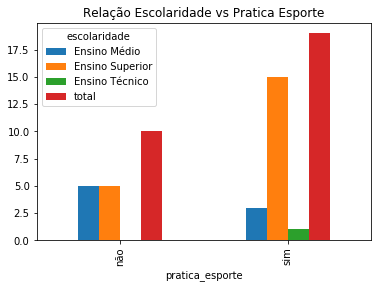

In [32]:
df_grafico = cadastro_df[['escolaridade','pratica_esporte']]
crosstab = pd.crosstab(cadastro_df['pratica_esporte'],cadastro_df['escolaridade'])

print(crosstab)

crosstab['total'] = crosstab.sum(axis=1)
crosstab.plot(kind='bar' , title = 'Relação Escolaridade vs Pratica Esporte')

Mostre de forma gráfica a distribuição de estados do cadastro ?


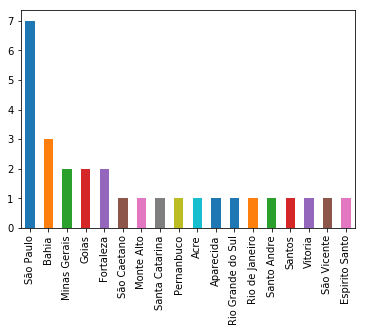

In [42]:
cadastro_completo_df['cidade'].value_counts().plot(kind='bar')

In [43]:
cadastro_df.corr()

,ano_nascimento,experiencia profissional,filhos,quanta_vezes_na_semana_pratica_esporte,ano_atual,idade
ano_nascimento,1.000000,-0.257518,-0.389758,0.129391,NaN,-1.000000
experiencia profissional,-0.257518,1.000000,0.417138,-0.031397,NaN,0.257518
filhos,-0.389758,0.417138,1.000000,-0.172890,NaN,0.389758
quanta_vezes_na_semana_pratica_esporte,0.129391,-0.031397,-0.172890,1.000000,NaN,-0.129391
ano_atual,NaN,NaN,NaN,NaN,NaN,NaN
idade,-1.000000,0.257518,0.389758,-0.129391,NaN,1.000000


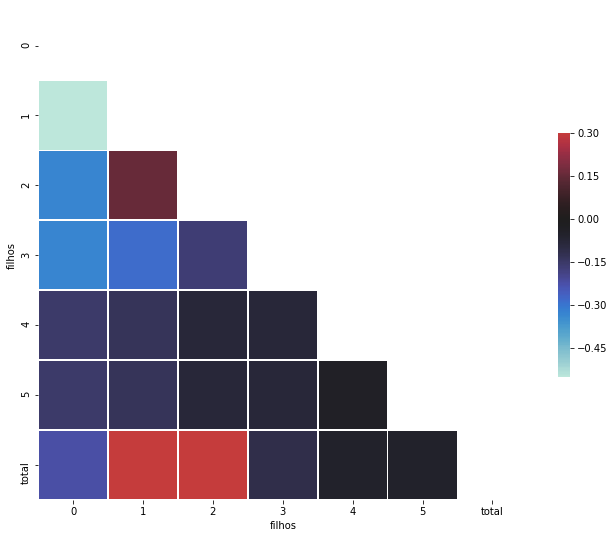

In [8]:
mapa_df = pd.read_csv('cadastro.csv.csv')

mapa_calor_df = pd.crosstab(df['nome'],df['filhos'])

mapa_calor_df['total'] = mapa_calor_df.sum(axis=1)

corr = mapa_calor_df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = mp.subplots(figsize=(11, 9))

sb.heatmap(corr, mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})